In [2]:
%load_ext sql
%sql sqlite:///chinook.db

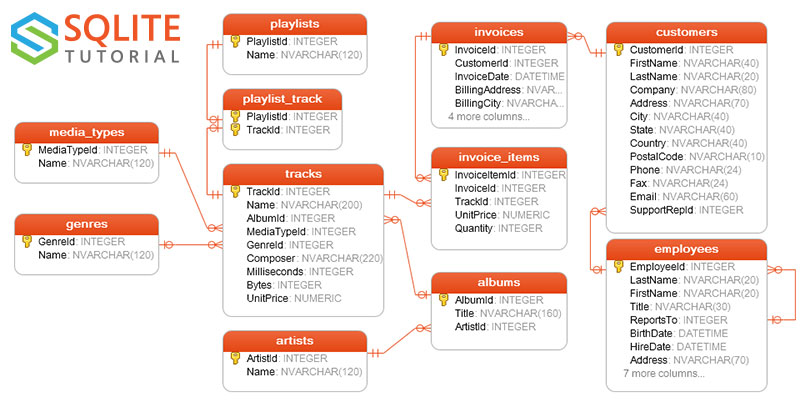

## Задание 1
Для каждого артиста вывести все жанры, которые есть в его песнях, и для каждого жанра вывести наиболее продолжительную песню этого артиста.

In [4]:
%%sql

with RankedSongs as (
  select a.ArtistId, g.Name as Genre, t.Name as SongTitle, t.Milliseconds as Duration,
        row_number()
                over (partition by a.ArtistId, g.Name order by t.Milliseconds desc) as row_num
  from artists a
    join albums al on a.ArtistId = al.ArtistId
    join tracks t on al.AlbumId = t.AlbumId
    join genres g on t.GenreId = g.GenreId
)

select rs.ArtistId, a.Name as ArtistName, rs.Genre, rs.SongTitle, rs.Duration from RankedSongs rs
    JOIN artists a on rs.ArtistId = a.ArtistId
where rs.row_num = 1 limit 20;

 * sqlite:///chinook.db
Done.


ArtistId,ArtistName,Genre,SongTitle,Duration
1,AC/DC,Rock,Overdose,369319
2,Accept,Rock,Princess of the Dawn,375418
3,Aerosmith,Rock,Livin' On The Edge,381231
4,Alanis Morissette,Rock,You Oughta Know (Alternate),491885
5,Alice In Chains,Rock,"Love, Hate, Love",387134
6,Antônio Carlos Jobim,Jazz,O Boto (Bôto),366837
6,Antônio Carlos Jobim,Latin,Só Tinha De Ser Com Você,389642
7,Apocalyptica,Metal,Master Of Puppets,436453
8,Audioslave,Alternative,Show Me How to Live (Live at the Quart Festival),301974
8,Audioslave,Alternative & Punk,The Curse,309786


## Задание 2
Посчитать скользящее среднее выручки по годам.


In [19]:
%%sql

with AnnualRevenue as (
  select invoiceid, strftime('%Y', InvoiceDate) AS Year, Total as Revenue,
        dense_rank()
                over (partition by strftime('%Y', InvoiceDate) order by invoiceid) as dense
  from Invoices inv
)

select AR.*, avg(Revenue) over (partition by Year
                                order by dense
                                rows between unbounded preceding and current row) average_revenue
from AnnualRevenue AR limit 86;

 * sqlite:///chinook.db
Done.


invoiceid,Year,Revenue,dense,average_revenue
1,2009,1.98,1,1.98
2,2009,3.96,2,2.9699999999999998
3,2009,5.94,3,3.9599999999999995
4,2009,8.91,4,5.1975
5,2009,13.86,5,6.93
6,2009,0.99,6,5.94
7,2009,1.98,7,5.374285714285714
8,2009,1.98,8,4.949999999999999
9,2009,3.96,9,4.84
10,2009,5.94,10,4.949999999999999


## Задание 3

Для каждого плейлиста вывести трек с наибольшей продолжительностью, трек с наименьшей стоимостью (если у треков одинаковая стоимость, то вывести тот, который весит меньше всех), и жанр данного плейлиста (жанром плейлиста будет называться тот жанр, треков которого больше всех в плейлисте).

In [35]:
%%sql

with TrackMaxDuration as (
  select al.AlbumId, t.TrackId, t.Name as SongTitle, t.Milliseconds as Duration,
    row_number()
        over (partition by al.AlbumId order by t.Milliseconds desc) as num_Duration
  from albums al
  join tracks t on al.AlbumId = t.AlbumId
  join genres g on t.GenreId = g.GenreId
),

TrackWithMinPrice as (
  select al.AlbumId, t.TrackId, t.Name as SongTitle, t.UnitPrice, t.bytes,
    row_number()
        over (partition by al.AlbumId order by t.UnitPrice asc, t.bytes asc) as num_Price
  from albums al
  join tracks t on al.AlbumId = t.AlbumId
  join genres g on t.GenreId = g.GenreId
),

MostCommonGenre as (
  select al.AlbumId, g.Name as Genre, count(t.TrackId) as GenreCount,
    rank()
        over (partition by al.AlbumId order by count(t.TrackId) desc) as num_Genre
  from albums al
  join tracks t on al.AlbumId = t.AlbumId
  join genres g on t.GenreId = g.GenreId
  group by al.AlbumId, g.Name
)

select tmd.AlbumId, tmd.SongTitle as TrackWithMaxDuration, twmp.SongTitle as TrackWithMinPrice, mcg.Genre as MostCommonGenre from TrackMaxDuration tmd
    join TrackWithMinPrice twmp on tmd.AlbumId = twmp.AlbumId and twmp.num_Price = 1
    join MostCommonGenre mcg on tmd.AlbumId = mcg.AlbumId and mcg.num_Genre = 1
where tmd.num_Duration = 1
order by tmd.AlbumId limit 10;

 * sqlite:///chinook.db
Done.


AlbumId,TrackWithMaxDuration,TrackWithMinPrice,MostCommonGenre
1,For Those About To Rock (We Salute You),C.O.D.,Rock
2,Balls to the Wall,Balls to the Wall,Rock
3,Princess of the Dawn,Fast As a Shark,Rock
4,Overdose,Dog Eat Dog,Rock
5,Livin' On The Edge,Deuces Are Wild,Rock
6,You Oughta Know (Alternate),Right Through You,Rock
7,"Love, Hate, Love",We Die Young,Rock
8,O Boto (Bôto),Outra Vez,Jazz
9,Master Of Puppets,Enter Sandman,Metal
10,Shadow on the Sun,Exploder,Rock


## Задание 4

Для каждого жанра вывести треки, которые встречались в большем числе заказов,
сумму, потраченную на данные треки, количество купленных треков и компанию, которая больше всех приобрела данную композицию.

In [46]:
%%sql

with RankedSongs as (
  select g.GenreId, t.TrackId, t.Name as SongTitle, sum(ii.UnitPrice) as UnitPrice, count(ii.TrackId) as cnt, c.Company,
    rank()
        over (partition by g.GenreId order by count(ii.TrackId) desc) as num_cnt
  from invoice_items ii
  join tracks t on ii.TrackId = t.TrackId
  join genres g on t.GenreId = g.GenreId
  join invoices i on ii.InvoiceId = i.InvoiceId
  join customers c on i.CustomerId = c.CustomerId
  group by g.GenreId, t.Name
)

select rs.GenreId, rs.SongTitle, rs.UnitPrice, rs.cnt as Count, rs.Company
from RankedSongs rs
where rs.num_cnt = 1
order by rs.GenreId limit 20;

 * sqlite:///chinook.db
Done.


GenreId,SongTitle,UnitPrice,Count,Company
1,Sure Know Something,3.96,4,None
1,Eruption,3.96,4,None
2,The Duke,1.98,2,None
2,Surrender,1.98,2,JetBrains s.r.o.
2,Starburst,1.98,2,None
2,Por Causa De Você,1.98,2,Telus
2,Lemon Drop,1.98,2,None
2,Lamento De Carnaval,1.98,2,Google Inc.
2,L'Arc En Ciel De Miles,1.98,2,None
2,J Squared,1.98,2,Apple Inc.


## Задание 5
Составить рейтинг клиентов по количеству потраченных ими денег.

In [75]:
%%sql

select c.FirstName, c.LastName, sum(ii.UnitPrice) as Spent,
  row_number()
      over (order by sum(ii.UnitPrice) desc) as num_cnt
from customers c
    join invoices i on c.CustomerId = i.CustomerId
    join invoice_items ii on i.InvoiceId = ii.InvoiceId
    join tracks t on ii.TrackId = t.TrackId
    join genres g on t.GenreId = g.GenreId
GROUP BY c.CustomerId

 * sqlite:///chinook.db
Done.


FirstName,LastName,Spent,num_cnt
Helena,Holý,49.620000000000005,1
Richard,Cunningham,47.62000000000002,2
Luis,Rojas,46.62000000000002,3
Ladislav,Kovács,45.62000000000001,4
Hugh,O'Reilly,45.62000000000001,5
Fynn,Zimmermann,43.62000000000001,6
Frank,Ralston,43.62,7
Julia,Barnett,43.61999999999999,8
Victor,Stevens,42.620000000000005,9
Astrid,Gruber,42.62,10
